# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [7]:
#carregando bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import pandas as pd
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [22]:
#carregando Dataset
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [23]:
#Criando matriz
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [24]:
modelo = sm.OLS(y, X).fit()
tips['reg_log'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.21e-18
Time:                        18:19:42   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#retirando variaveis não significantes

y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)

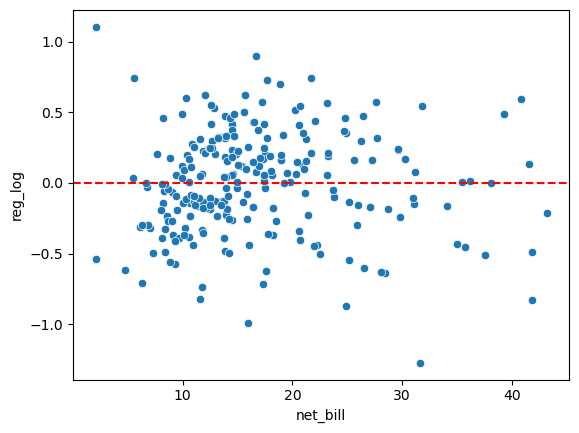

In [27]:
#Gráfico resid.

sns.scatterplot(x='net_bill', y='reg_log', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [28]:
y, X = patsy.dmatrices('np.log(tip) ~ smoker + np.log(net_bill)', tips)
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.20e-21
Time:                        18:25:18   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y, X = patsy.dmatrices('np.log(tip) ~ smoker + np.power(net_bill,2)', tips)
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           5.45e-16
Time:                        18:26:21   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#modelo de log(1)

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [36]:
#modelo sem log
y, X = patsy.dmatrices('tip ~ smoker + net_bill', tips)
modelo_s_log = sm.OLS(y, X).fit()

In [37]:
modelo_s_log.rsquared

0.33489135467728137

In [ ]:
#melhor C.D foi o modelo sem log

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [39]:
#carregando a base
dff = pd.read_csv('previsao_de_renda.csv')

In [77]:
#dff.head()

In [42]:
#modelo linear simples
reg = smf.ols('renda ~ tempo_emprego', data=dff).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:47:27   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

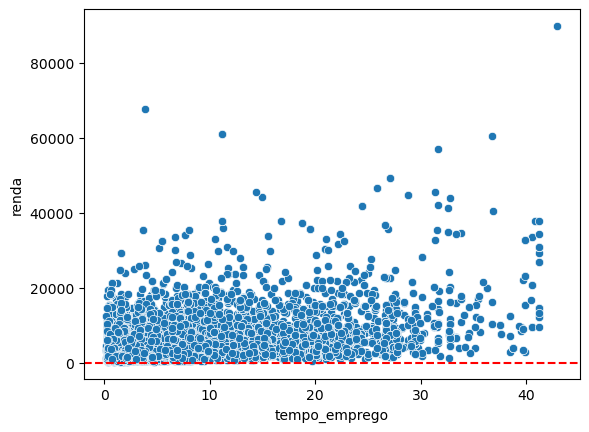

In [47]:
#analise dos resid. melhoraria ajustando para log ou poli
sns.scatterplot(x='tempo_emprego', y='renda', data=dff)
plt.axhline(y=0, color='r', linestyle='--')

In [95]:
#analisando qual a melhor variável para adicionar
dff.corr()

C:\Users\joass\AppData\Local\Temp\ipykernel_12136\1601616160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr().copy()


,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


In [84]:
#
y, X = patsy.dmatrices('renda ~ np.power(tempo_emprego,2) + idade + posse_de_veiculo', dff)
modelo2 = sm.OLS(y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     867.2
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:10:33   Log-Likelihood:            -1.2236e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12462   BIC:                         2.448e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2913.3590    187.068     15.574      0.000    2546.677    3280.041
posse_de_veiculo[T.True]     801.4804     80.931      9.903      0.000     642.843     960.118
np.power(tempo_emprego, 2)     9.9801      0.212     47.030      0.000       9.564      10.396
idade                         13.2874      4.497      2.954      0.003       4.472      22.103
==============================================================================
Omnibus:                     9682.714   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340625.442
Skew:                           3.435   Prob(JB):                         0.00
Kurtosis:                      27.669   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#todas variaveis são significantes

## criando um df novo só com 2 variaves para ter uma analise dos resíduos

In [96]:
df_n = pd.DataFrame()

In [103]:
df_n[['rendas', 'emp']] = dff[['renda', 'tempo_emprego']]

In [114]:
#resíduos 2
dff = modelo2.resid

In [115]:
df_n['res'] = dfff

In [116]:
df_n.head()

,rendas,res,emp
0,3369.24,-150.039919,3.575342
1,6096.14,1815.845579,0.860274
2,5658.98,882.964980,8.065753
3,7246.69,2852.913837,1.208219
4,4017.37,-1507.967353,13.873973


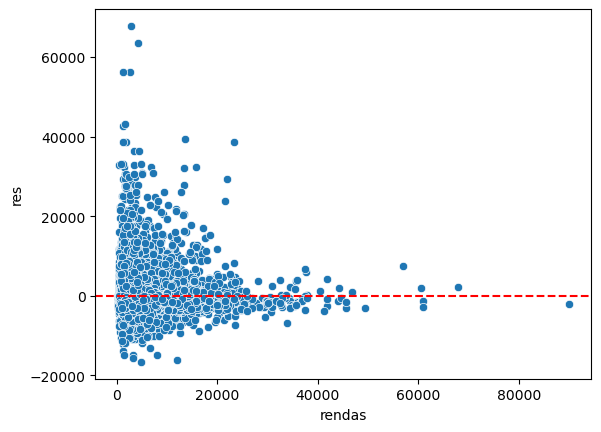

In [117]:
sns.scatterplot(x='rendas', y='res', data=df_n)
plt.axhline(y=0, color='r', linestyle='--')

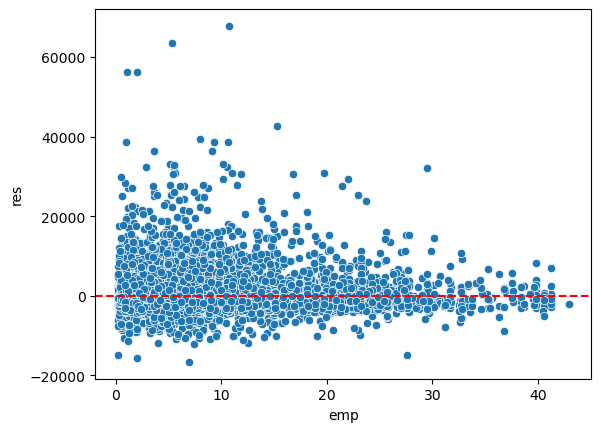

In [118]:
sns.scatterplot(x='emp', y='res', data=df_n)
plt.axhline(y=0, color='r', linestyle='--')